<a href="https://colab.research.google.com/github/thales20266/Projeto-Transfer-Learning/blob/main/reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install mtcnn deepface opencv-python-headless

In [21]:
from deepface import DeepFace
import os

dataset_path = "/content/dataset"

# Para cada subpasta, o DeepFace vai gerar embeddings
# e salvar em cache para depois reconhecer
for person_folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, person_folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        # Apenas processa e gera embedding, não retorna nada ainda
        DeepFace.represent(img_path=img_path, model_name="Facenet", enforce_detection=True)

25-09-15 19:34:55 - Searching /content/face_crop.jpg in 6 length datastore
25-09-15 19:34:56 - find function duration 0.7296521663665771 seconds


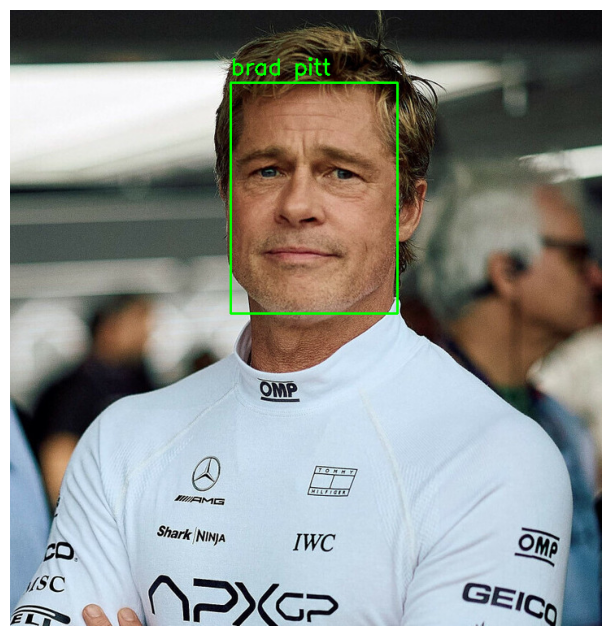

In [29]:
import cv2
from mtcnn import MTCNN
from deepface import DeepFace
import matplotlib.pyplot as plt

# Caminho da imagem de teste
test_img = "/content/7.jpg"
dataset_path = "/content/dataset"

# 1️⃣ Carregar a imagem
img = cv2.imread(test_img)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2️⃣ Detectar faces com MTCNN
detector = MTCNN()
faces = detector.detect_faces(rgb)

if len(faces) == 0:
    print("Nenhuma face detectada.")
else:
    for face_info in faces:
        x, y, w, h = face_info['box']
        # Garantir que os valores sejam positivos
        x, y, w, h = max(0,x), max(0,y), max(0,w), max(0,h)

        # 3️⃣ Recortar a face para reconhecimento
        face_crop = rgb[y:y+h, x:x+w]
        cv2.imwrite("/content/face_crop.jpg", cv2.cvtColor(face_crop, cv2.COLOR_RGB2BGR))

        # 4️⃣ Reconhecer a pessoa usando DeepFace
        result_list = DeepFace.find(img_path="/content/face_crop.jpg",
                                    db_path=dataset_path,
                                    model_name="Facenet",
                                    enforce_detection=True)
        result = result_list[0]

        if not result.empty:
            first_match_path = result.iloc[0]['identity']
            person_name = first_match_path.split('/')[-2]
        else:
            person_name = "Desconhecido"

        # 5️⃣ Desenhar retângulo e escrever nome
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # verde, 2px
        cv2.putText(img, person_name, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # 6️⃣ Mostrar imagem final
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
